## **1- Loading the dataset + libraries**

In [1]:
import os
from PIL import Image
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="G5NOgWpGeRvNrfA8BZJS")
project = rf.workspace("hehe-ngdal").project("orchid-leaf-spots-blujx")
version = project.version(11)
dataset = version.download("yolov8")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.3/85.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 13.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 89.9 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Orchid-leaf-spots-11 in yolov8:: 100%|██████████| 3808/3808 [00:00<00:00, 5543.92it/s]


In [3]:
path= '/content/Orchid-leaf-spots-11'

In [4]:
# Load dataset configuration
dataset_path = path + "/data.yaml"

# Check dataset information
print(open(dataset_path).read())

names:
- burn
- rot
- spot
nc: 3
roboflow:
  license: CC BY 4.0
  project: orchid-leaf-spots-blujx
  url: https://universe.roboflow.com/hehe-ngdal/orchid-leaf-spots-blujx/dataset/11
  version: 11
  workspace: hehe-ngdal
test: ../test/images
train: ../train/images
val: ../valid/images



## **2- Image Preprocessing**

1- remove unvalid images

In [5]:
bad_files = []  # List to store paths of bad files

# Folders to check
splits = ["train", "valid", "test"]

for split in splits:
    images_folder = os.path.join("/content/Orchid-leaf-spots-11", split, "images")

    for file in os.listdir(images_folder):
        file_path = os.path.join(images_folder, file)

        try:
            # Open image to check validity
            with Image.open(file_path) as img:
                img.verify()  # Verifies the image integrity without fully loading it

        except Exception as e:
            # If an error occurs (corrupted image), add to bad_files and remove it
            bad_files.append(file_path)
            print(f"Removing corrupted file: {file_path}")
            os.remove(file_path)

print(f"Removed {len(bad_files)} corrupted images.")


Removed 0 corrupted images.


## **3.1- Training a YOLOv8 Model**


In [6]:
# Install Ultralytics library which has Yolo
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 83.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.7 MB/s eta 0:00:00


In [7]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load YOLOv8 model (small version)
model = YOLO("yolov8s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 42.8MB/s]


Note: The YOLOv8 image size is 640. We can change it, but this is the best size. Additionally, we didn't assign the model to a variable because we are training an existing model and don't want to overwrite it.

##### trial 1

YOLOv8 does the augmentations by itself.

In [8]:
model.train(
    data=dataset_path,
    epochs=100,
    imgsz=640,
    hsv_h=0.015,  # Hue adjustment (default = 0.015)
    hsv_s=0.7,    # Saturation adjustment (default = 0.7)
    hsv_v=0.7,    # Brightness adjustment (default = 0.4)
    degrees=0.0,  # Rotation angle range (default = 0.0)
    translate=0.3, # Horizontal/vertical translation range (default = 0.1)
    scale=0.7,     # Scale range (default = 0.5)
    shear=0.0,     # Shear range (default = 0.0)
    flipud=0.0,    # Vertical flip probability (default = 0.0)
    fliplr=0.5,    # Horizontal flip probability (default = 0.5)
    mosaic=1.0,    # Mosaic augmentation probability (default = 1.0)
    mixup=0.0      # Mixup probability (default = 0.0)
)


Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Orchid-leaf-spots-11/data.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=Tru

100%|██████████| 755k/755k [00:00<00:00, 92.8MB/s]

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

 22        [15, 18, 21]  1   2117209  ultralytics.nn.modules.head.Detect           [3, [128, 256, 512]]          
Model summary: 129 layers, 11,136,761 parameters, 11,136,745 gradients, 28.7 GFLOPs

Transferred 349/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


100%|██████████| 5.35M/5.35M [00:00<00:00, 351MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 25.0±4.9 MB/s, size: 67.6 KB)


train: Scanning /content/Orchid-leaf-spots-11/train/labels... 1566 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1566/1566 [00:03<00:00, 485.58it/s]

train: New cache created: /content/Orchid-leaf-spots-11/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 1228, len(boxes) = 14595. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 18.1±9.4 MB/s, size: 70.1 KB)


val: Scanning /content/Orchid-leaf-spots-11/valid/labels... 205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 205/205 [00:00<00:00, 431.42it/s]

val: New cache created: /content/Orchid-leaf-spots-11/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 174, len(boxes) = 2749. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      5.56G      2.439      2.623      1.772        124        640: 100%|██████████| 98/98 [00:35<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.10it/s]

                   all        205       2749      0.181      0.212      0.131     0.0422



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      6.13G      2.432      2.296      1.731        141        640: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


                   all        205       2749        0.2      0.316       0.15     0.0574

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      6.17G      2.451      2.289      1.767        180        640: 100%|██████████| 98/98 [00:32<00:00,  3.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.53it/s]


                   all        205       2749      0.199      0.281      0.149     0.0566

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      6.21G       2.45      2.308      1.768        769        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.28it/s]

                   all        205       2749      0.194      0.245      0.153     0.0541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      7.02G      2.436       2.28      1.762        347        640: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]


                   all        205       2749      0.252      0.204      0.149     0.0557

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      7.05G       2.39      2.216      1.699        122        640: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.71it/s]

                   all        205       2749      0.267      0.328      0.192     0.0775



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      7.09G      2.383      2.152      1.697        215        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]

                   all        205       2749       0.22      0.239        0.2     0.0786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      7.12G      2.375      2.126      1.669        115        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.96it/s]


                   all        205       2749      0.266      0.228      0.196     0.0764

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      7.16G      2.364       2.11      1.679        101        640: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        205       2749      0.273      0.199      0.174     0.0594



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       7.2G      2.353      2.089       1.67        125        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.21it/s]


                   all        205       2749      0.216      0.279      0.191     0.0792

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      7.23G      2.344       2.06      1.666        104        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        205       2749      0.228      0.217      0.176     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      7.27G      2.327      2.005      1.657        341        640: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        205       2749      0.227      0.365      0.188     0.0731



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      7.31G       2.31      1.974      1.648        179        640: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.34it/s]

                   all        205       2749      0.243       0.26       0.18      0.069



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      7.35G      2.282      1.982       1.64        104        640: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        205       2749      0.224      0.216      0.151     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      7.38G      2.295      1.951      1.618         88        640: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]


                   all        205       2749      0.232      0.237      0.156     0.0606

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      5.85G      2.312      1.916      1.611        113        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]


                   all        205       2749      0.181      0.233      0.149     0.0612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      6.38G      2.285      1.925      1.644        300        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        205       2749      0.221      0.223      0.188      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      6.38G      2.272      1.886      1.621        225        640: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        205       2749      0.265      0.234      0.166     0.0672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      6.96G      2.258      1.904      1.581        118        640: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]


                   all        205       2749      0.251      0.266      0.196      0.082

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      6.96G       2.25      1.895      1.612        206        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        205       2749      0.185      0.283      0.179     0.0727



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      6.96G       2.23      1.879        1.6        206        640: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]


                   all        205       2749      0.213      0.234      0.168     0.0683

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      6.96G      2.222      1.878      1.612        289        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        205       2749      0.247      0.241       0.16     0.0621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      7.57G      2.219      1.834      1.604        254        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        205       2749      0.246      0.239      0.173     0.0703



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100       5.1G      2.223      1.795      1.565         61        640: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]


                   all        205       2749      0.201      0.264      0.159     0.0636

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      6.26G      2.214      1.834       1.59         85        640: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.33it/s]

                   all        205       2749      0.199      0.222      0.144     0.0654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      6.26G      2.218      1.817      1.589         98        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        205       2749      0.222      0.224      0.152     0.0651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      6.26G      2.212      1.767       1.57        163        640: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        205       2749      0.274      0.227      0.183     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      6.26G      2.185      1.788      1.574        129        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.36it/s]

                   all        205       2749      0.245      0.265      0.168     0.0687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      6.29G      2.179      1.797      1.582         70        640: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]


                   all        205       2749      0.255      0.265      0.178     0.0735

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      6.33G      2.185      1.716      1.551        191        640: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.85it/s]


                   all        205       2749      0.288      0.262      0.232     0.0934

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      6.37G        2.2       1.74      1.565        118        640: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


                   all        205       2749      0.266      0.244      0.197     0.0831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100       6.4G      2.181      1.717      1.554        124        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.13it/s]

                   all        205       2749      0.257      0.207      0.163     0.0705



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      6.43G      2.158      1.716      1.547        249        640: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.08it/s]

                   all        205       2749      0.256      0.264      0.165     0.0682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      6.48G      2.167      1.718      1.536        237        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]

                   all        205       2749      0.298      0.233      0.212     0.0931



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      6.51G      2.167      1.712      1.559        143        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        205       2749      0.218      0.349      0.162     0.0646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      6.54G      2.156      1.667      1.544        416        640: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        205       2749      0.286       0.25      0.185     0.0762



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      6.58G      2.158      1.657      1.534        181        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.41it/s]

                   all        205       2749      0.231      0.269      0.205      0.095



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      6.62G      2.167      1.659      1.521        263        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        205       2749      0.272      0.225      0.167     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      6.65G      2.173      1.665      1.523         95        640: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        205       2749      0.209      0.253      0.161     0.0643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      6.69G      2.114      1.626      1.518        128        640: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.44it/s]

                   all        205       2749      0.233       0.29      0.178     0.0708



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      6.73G      2.128      1.642      1.534        210        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.04it/s]

                   all        205       2749      0.224      0.271      0.181     0.0835



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      7.52G      2.123      1.629      1.531        206        640: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.97it/s]

                   all        205       2749      0.244      0.228      0.171     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      6.01G      2.136      1.615      1.504         86        640: 100%|██████████| 98/98 [00:32<00:00,  3.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.77it/s]

                   all        205       2749      0.222      0.222      0.156     0.0667



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100       7.2G      2.106      1.581      1.511        119        640: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        205       2749      0.243      0.296      0.195     0.0839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       7.2G        2.1      1.608      1.514        117        640: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        205       2749      0.259      0.221      0.158      0.062



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       7.2G      2.123      1.582      1.499         95        640: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        205       2749      0.252      0.256      0.189     0.0759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       7.2G       2.08      1.542      1.491        178        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.87it/s]

                   all        205       2749      0.288      0.269      0.191     0.0785



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100       7.2G      2.077      1.526      1.498        115        640: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        205       2749      0.239      0.263      0.196     0.0793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100       7.2G       2.07      1.548      1.499        102        640: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]

                   all        205       2749      0.279      0.193      0.135     0.0583



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100       7.2G      2.082      1.537      1.493        162        640: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.12it/s]


                   all        205       2749      0.249      0.285      0.204     0.0826

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       7.2G      2.074      1.519      1.477        298        640: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.01it/s]

                   all        205       2749      0.237      0.223       0.17     0.0715



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      7.21G      2.064      1.501      1.472        188        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.52it/s]

                   all        205       2749      0.262      0.257      0.175     0.0722



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      7.96G      2.083      1.521      1.487        197        640: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        205       2749      0.277      0.232      0.182     0.0753



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      6.08G      2.062      1.491      1.471         76        640: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        205       2749      0.255      0.181      0.161     0.0666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      6.08G      2.052       1.49      1.485        367        640: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.72it/s]

                   all        205       2749      0.256      0.234      0.159     0.0624



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      6.08G      2.044      1.475      1.465        130        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.02it/s]

                   all        205       2749      0.289      0.245      0.188     0.0776



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      6.08G      2.024      1.451      1.473        139        640: 100%|██████████| 98/98 [00:31<00:00,  3.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.09it/s]


                   all        205       2749      0.253      0.207      0.179     0.0727

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      6.08G      2.024      1.452      1.465        308        640: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.62it/s]

                   all        205       2749      0.246      0.217      0.158     0.0647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      6.08G      2.022      1.446      1.466        114        640: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        205       2749      0.291       0.27      0.208     0.0815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      6.11G      2.039      1.431      1.447        185        640: 100%|██████████| 98/98 [00:31<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.94it/s]

                   all        205       2749      0.267      0.235      0.184     0.0763



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      6.14G       2.03      1.445      1.458        100        640: 100%|██████████| 98/98 [00:35<00:00,  2.75it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        205       2749       0.28      0.232      0.185     0.0758



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      7.01G      2.011      1.428      1.451        403        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.43it/s]


                   all        205       2749      0.264      0.295      0.192     0.0776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      7.04G       2.01      1.428      1.462        213        640: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.16it/s]

                   all        205       2749      0.289      0.187      0.173     0.0719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      7.07G      1.982      1.383      1.427        228        640: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.00it/s]

                   all        205       2749      0.298      0.258      0.179     0.0741



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      7.12G      1.993      1.411      1.437        225        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.48it/s]

                   all        205       2749      0.257       0.21      0.164     0.0696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      7.16G      1.951      1.367       1.42        189        640: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.14it/s]

                   all        205       2749      0.312      0.234      0.185      0.078



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      7.18G      1.979      1.416      1.423        209        640: 100%|██████████| 98/98 [00:31<00:00,  3.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.95it/s]

                   all        205       2749      0.294      0.302      0.212     0.0879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      7.22G          2       1.36      1.417        150        640: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        205       2749      0.305      0.255      0.201     0.0847



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      7.25G      1.975      1.366      1.414        122        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]

                   all        205       2749      0.314      0.285      0.214     0.0873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100       7.3G       1.97      1.333      1.414        271        640: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.68it/s]

                   all        205       2749      0.295      0.226      0.205     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      7.33G      1.949      1.319      1.418        256        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.91it/s]

                   all        205       2749      0.285      0.224      0.178     0.0724



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      7.36G      1.952      1.348      1.423        104        640: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.99it/s]

                   all        205       2749      0.285      0.242      0.188     0.0754



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      5.88G      1.958      1.333      1.387        344        640: 100%|██████████| 98/98 [00:32<00:00,  3.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.84it/s]

                   all        205       2749      0.284      0.246      0.198     0.0828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      6.41G      1.944      1.312      1.413        127        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.78it/s]

                   all        205       2749      0.266      0.238       0.18     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      6.41G      1.949      1.322      1.419        109        640: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        205       2749      0.292      0.271      0.214      0.087



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      6.41G      1.935      1.306      1.399        136        640: 100%|██████████| 98/98 [00:32<00:00,  3.05it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.79it/s]

                   all        205       2749      0.275      0.213      0.173     0.0771



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      6.41G      1.919      1.281      1.385        340        640: 100%|██████████| 98/98 [00:31<00:00,  3.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.93it/s]

                   all        205       2749      0.264      0.219      0.163      0.066



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      6.41G      1.911      1.271      1.384        158        640: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.10it/s]


                   all        205       2749        0.3      0.236      0.192     0.0788

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      6.41G      1.923      1.267      1.389        122        640: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        205       2749        0.3      0.212      0.176     0.0721



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100      6.41G      1.886      1.256      1.383        197        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.05it/s]


                   all        205       2749      0.279      0.197      0.156     0.0631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      6.41G       1.92      1.248      1.366        384        640: 100%|██████████| 98/98 [00:32<00:00,  3.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        205       2749       0.26        0.2      0.154     0.0644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100         7G      1.896      1.241      1.364        291        640: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.57it/s]

                   all        205       2749      0.271      0.215      0.166     0.0694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      7.04G      1.899      1.229      1.356        185        640: 100%|██████████| 98/98 [00:31<00:00,  3.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.82it/s]

                   all        205       2749      0.305      0.262      0.186     0.0764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      7.07G      1.855      1.213      1.366        153        640: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.17it/s]

                   all        205       2749      0.319      0.241      0.171     0.0704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      7.71G      1.889      1.209      1.359        181        640: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        205       2749      0.291      0.229       0.18     0.0748



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      6.66G      1.884      1.232      1.363        103        640: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.63it/s]

                   all        205       2749      0.266      0.265      0.169     0.0686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      6.66G      1.858      1.206       1.36        179        640: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.18it/s]

                   all        205       2749      0.292      0.247      0.172     0.0713



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      6.66G      1.863      1.181      1.347        210        640: 100%|██████████| 98/98 [00:32<00:00,  3.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.89it/s]

                   all        205       2749      0.295      0.249      0.187     0.0777



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      6.66G      1.857       1.18      1.353         96        640: 100%|██████████| 98/98 [00:31<00:00,  3.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.58it/s]

                   all        205       2749      0.298      0.239      0.172     0.0706



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      6.66G      1.834      1.178      1.349        187        640: 100%|██████████| 98/98 [00:32<00:00,  3.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.07it/s]

                   all        205       2749      0.292       0.26      0.183     0.0743


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      6.66G      1.872      1.217      1.423        150        640: 100%|██████████| 98/98 [00:33<00:00,  2.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        205       2749      0.285      0.265      0.185     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      6.67G      1.841      1.153      1.395        141        640: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.42it/s]


                   all        205       2749      0.341      0.256      0.196     0.0793

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      6.71G      1.831      1.157      1.382         71        640: 100%|██████████| 98/98 [00:30<00:00,  3.17it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        205       2749      0.315      0.209      0.173     0.0693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      6.75G      1.816       1.15      1.403         48        640: 100%|██████████| 98/98 [00:31<00:00,  3.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.70it/s]

                   all        205       2749      0.292      0.221      0.171     0.0681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      6.78G      1.793      1.123      1.382         89        640: 100%|██████████| 98/98 [00:30<00:00,  3.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.20it/s]

                   all        205       2749      0.314      0.244      0.182     0.0736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      6.82G      1.812      1.124      1.368         72        640: 100%|██████████| 98/98 [00:31<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.06it/s]

                   all        205       2749      0.299      0.248      0.181     0.0737



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      6.86G      1.813      1.106      1.367         80        640: 100%|██████████| 98/98 [00:31<00:00,  3.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.51it/s]

                   all        205       2749      0.313      0.241      0.183     0.0742



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      6.89G      1.788      1.107      1.373        185        640: 100%|██████████| 98/98 [00:30<00:00,  3.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.11it/s]

                   all        205       2749      0.315      0.242      0.178     0.0723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      6.93G      1.795      1.116      1.362        144        640: 100%|██████████| 98/98 [00:31<00:00,  3.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  2.64it/s]

                   all        205       2749       0.32      0.237      0.177      0.072



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      6.97G      1.776      1.093      1.362        164        640: 100%|██████████| 98/98 [00:30<00:00,  3.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:02<00:00,  3.15it/s]

                   all        205       2749      0.338      0.231      0.175     0.0713



100 epochs completed in 0.970 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 22.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 22.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]


                   all        205       2749      0.288      0.263      0.233     0.0935
                  burn          6          9          0          0    0.00262    0.00142
                   rot        103        513       0.59       0.41      0.484      0.216
                  spot        139       2227      0.274      0.378      0.211     0.0626
Speed: 0.3ms preprocess, 4.8ms inference, 0.0ms loss, 6.3ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7b50db715c50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04

In [35]:
# Train on the dataset
model.train(data=dataset_path, epochs=100, imgsz=640,scale: 0.5)

SyntaxError: positional argument follows keyword argument (<ipython-input-35-f770b6115db2>, line 2)

evaluate

In [9]:
metrics = model.val(data=dataset_path)

Ultralytics 8.3.121 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,745 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1738.1±232.5 MB/s, size: 68.3 KB)


val: Scanning /content/Orchid-leaf-spots-11/valid/labels.cache... 205 images, 0 backgrounds, 0 corrupt: 100%|██████████| 205/205 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 174, len(boxes) = 2749. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 13/13 [00:05<00:00,  2.20it/s]


                   all        205       2749       0.29      0.262      0.232     0.0934
                  burn          6          9          0          0    0.00263    0.00142
                   rot        103        513      0.596      0.411      0.485      0.217
                  spot        139       2227      0.273      0.375      0.209     0.0621
Speed: 2.1ms preprocess, 11.6ms inference, 0.0ms loss, 3.4ms postprocess per image
Results saved to runs/detect/train2


test:

FileNotFoundError: [Errno 2] No such file or directory: 'yolov8s_Custom.pt'

In [11]:
model = YOLO(model.trainer.best)  # Use the best weights


In [12]:
from ultralytics import YOLO

# Save full model including architecture, weights, metadata
model.save("yolov8s_custom1.pt")


image 1/1 /content/Orchid-leaf-spots-11/test/images/DSC00112-800x600_jpg.rf.18d2c86a93bf2237f3a15f9a08b6abb3.jpg: 640x640 1 spot, 16.3ms
Speed: 2.7ms preprocess, 16.3ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


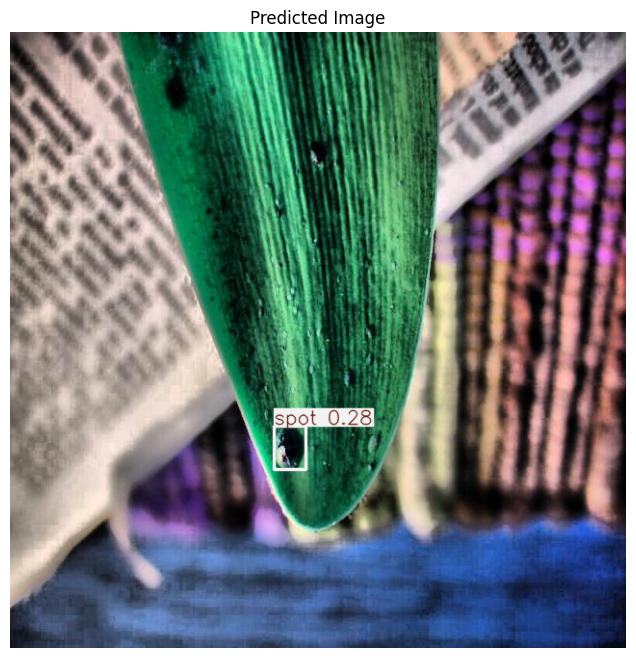

In [13]:
results = model("/content/Orchid-leaf-spots-11/test/images/DSC00112-800x600_jpg.rf.18d2c86a93bf2237f3a15f9a08b6abb3.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


image 1/1 /content/Orchid-leaf-spots-11/test/images/IMG_0019_jpg.rf.0ebc9afe8744c745acf7944305c885d8.jpg: 640x640 4 rots, 2 spots, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


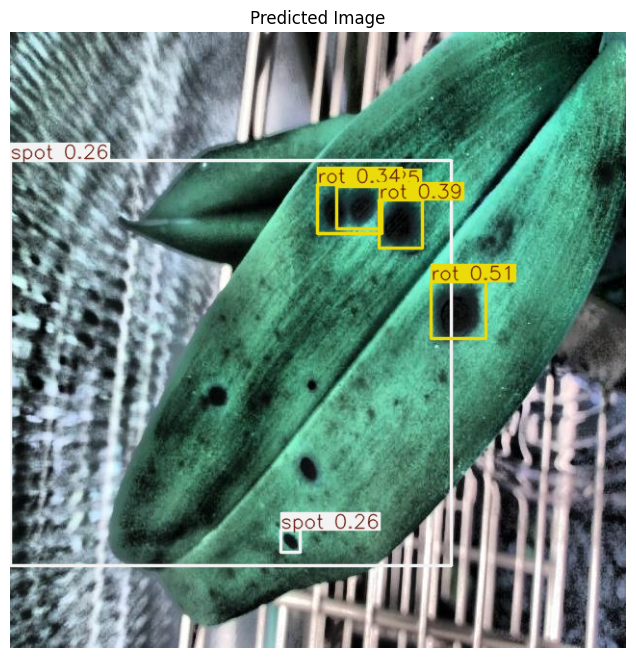

In [14]:
results = model("/content/Orchid-leaf-spots-11/test/images/IMG_0019_jpg.rf.0ebc9afe8744c745acf7944305c885d8.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


image 1/1 /content/Orchid-leaf-spots-11/test/images/images-2025-01-08T164930_810_jpg.rf.6927650abee10019a3a04681ae9424fb.jpg: 640x640 1 rot, 16.4ms
Speed: 2.0ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


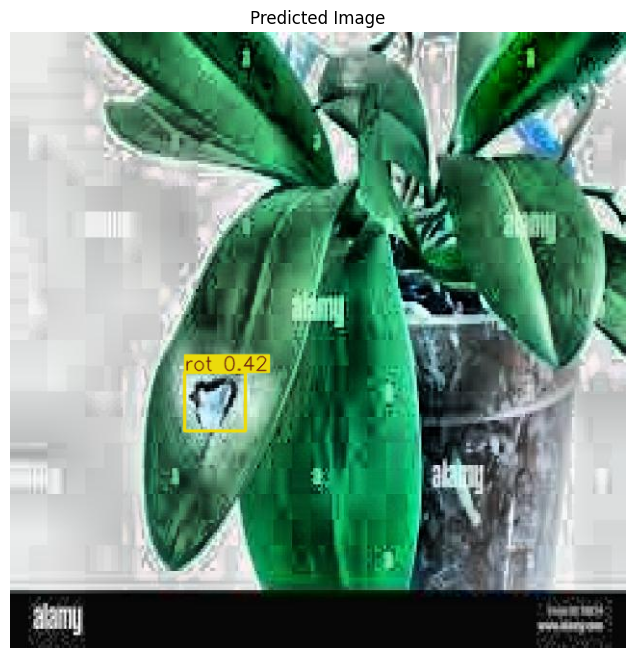

In [15]:
results = model("/content/Orchid-leaf-spots-11/test/images/images-2025-01-08T164930_810_jpg.rf.6927650abee10019a3a04681ae9424fb.jpg", save=True)

# Convert result to a NumPy array and display
predicted_image = results[0].plot()  # Convert prediction to an image

plt.figure(figsize=(8, 8))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()


image 1/1 /content/Orchid-leaf-spots-11/test/images/images-2025-01-08T164930_810_jpg.rf.6927650abee10019a3a04681ae9424fb.jpg: 640x640 1 rot, 16.4ms
Speed: 2.1ms preprocess, 16.4ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


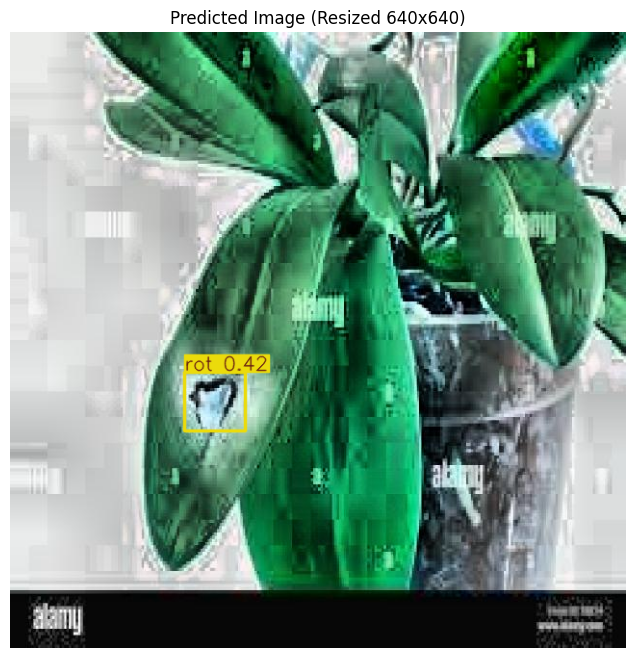

In [16]:
import cv2
import matplotlib.pyplot as plt

# Get prediction
results = model("/content/Orchid-leaf-spots-11/test/images/images-2025-01-08T164930_810_jpg.rf.6927650abee10019a3a04681ae9424fb.jpg", save=True)

# Convert prediction to an image (NumPy array)
predicted_image = results[0].plot()

# Resize the image to 640x640
resized_image = cv2.resize(predicted_image, (640, 640))

# Display the resized image
plt.figure(figsize=(8, 8))
plt.imshow(resized_image)
plt.axis("off")
plt.title("Predicted Image (Resized 640x640)")
plt.show()



image 1/1 /content/spots.jpg: 480x640 85 spots, 42.9ms
Speed: 3.5ms preprocess, 42.9ms inference, 1.7ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict


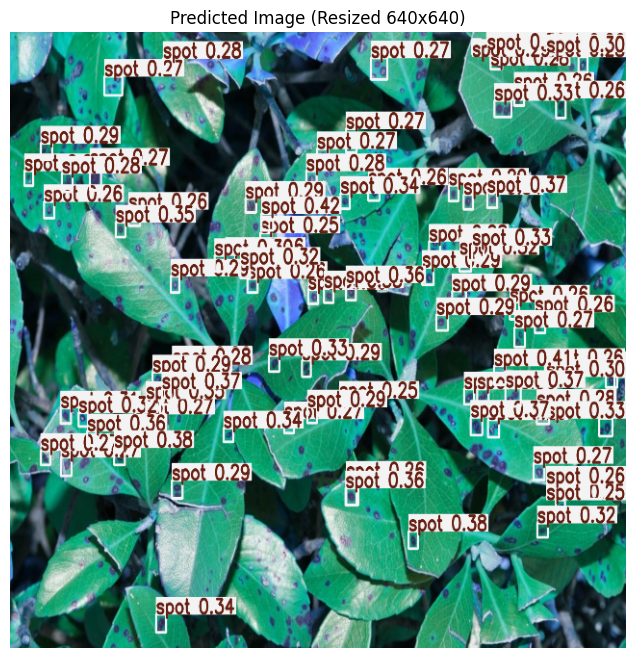

In [17]:
# Get prediction
results = model("/content/spots.jpg", save=True)

# Convert prediction to an image (NumPy array)
predicted_image = results[0].plot()

# Resize the image to 640x640
resized_image = cv2.resize(predicted_image, (640, 640))

# Display the resized image
plt.figure(figsize=(8, 8))
plt.imshow(resized_image)
plt.axis("off")
plt.title("Predicted Image (Resized 640x640)")
plt.show()



image 1/1 /content/rot.jpg: 352x640 1 rot, 10 spots, 44.6ms
Speed: 3.5ms preprocess, 44.6ms inference, 1.8ms postprocess per image at shape (1, 3, 352, 640)
Results saved to runs/detect/predict


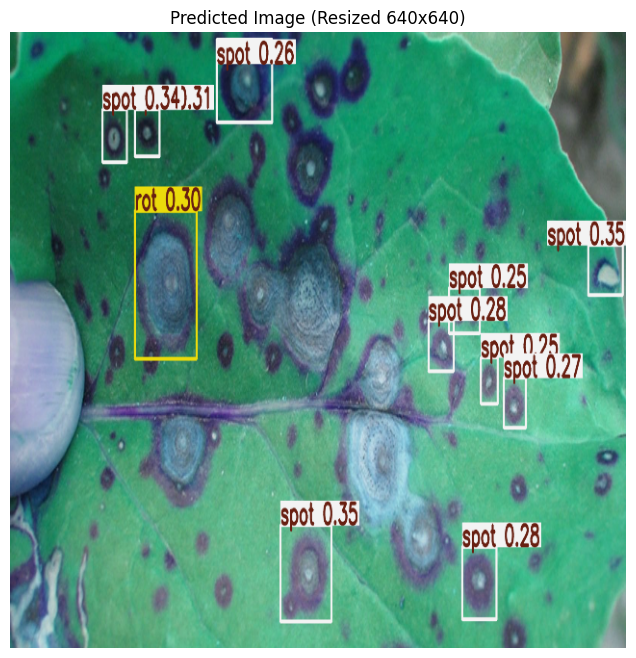

In [18]:
# Get prediction
results = model("/content/rot.jpg", save=True)

# Convert prediction to an image (NumPy array)
predicted_image = results[0].plot()

# Resize the image to 640x640
resized_image = cv2.resize(predicted_image, (640, 640))

# Display the resized image
plt.figure(figsize=(8, 8))
plt.imshow(resized_image)
plt.axis("off")
plt.title("Predicted Image (Resized 640x640)")
plt.show()


In [ ]:
# Get prediction
results = model("/content/5807785126069913865.jpg", save=True)

# Convert prediction to an image (NumPy array)
predicted_image = results[0].plot()

# Resize the image to 640x640
resized_image = cv2.resize(predicted_image, (640, 640))

# Display the resized image
plt.figure(figsize=(8, 8))
plt.imshow(resized_image)
plt.axis("off")
plt.title("Predicted Image (Resized 640x640)")
plt.show()



image 1/1 /content/rahaf image.jpg: 640x480 (no detections), 48.7ms
Speed: 4.7ms preprocess, 48.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


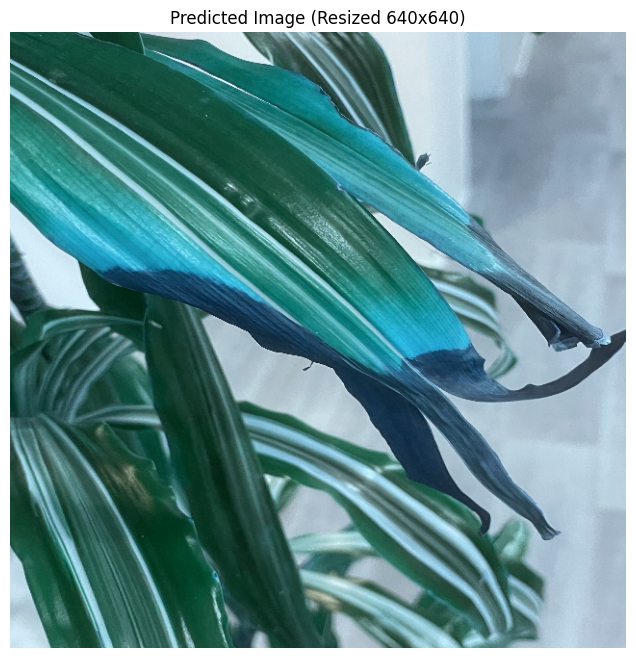

In [19]:
# Get prediction
results = model("/content/rahaf image.jpg", save=True)

# Convert prediction to an image (NumPy array)
predicted_image = results[0].plot()

# Resize the image to 640x640
resized_image = cv2.resize(predicted_image, (640, 640))

# Display the resized image
plt.figure(figsize=(8, 8))
plt.imshow(resized_image)
plt.axis("off")
plt.title("Predicted Image (Resized 640x640)")
plt.show()



image 1/1 /content/rahaf image2.jpg: 640x480 (no detections), 12.2ms
Speed: 3.9ms preprocess, 12.2ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


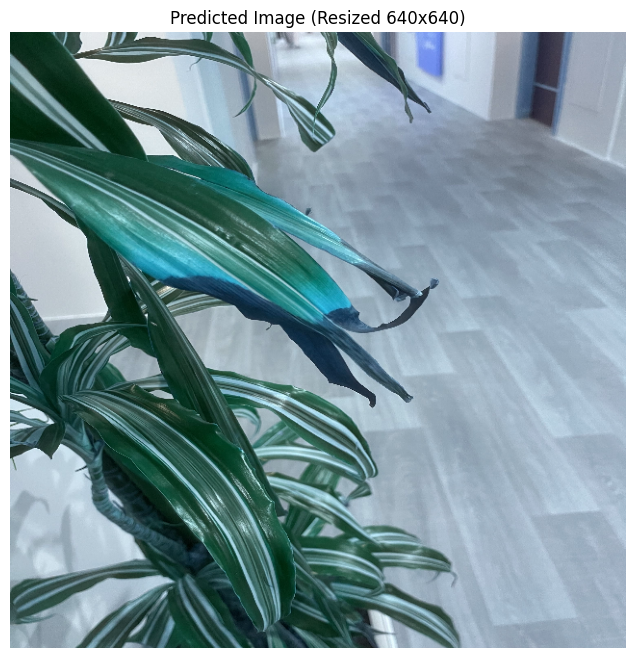

In [20]:
# Get prediction
results = model("/content/rahaf image2.jpg", save=True)

# Convert prediction to an image (NumPy array)
predicted_image = results[0].plot()

# Resize the image to 640x640
resized_image = cv2.resize(predicted_image, (640, 640))

# Display the resized image
plt.figure(figsize=(8, 8))
plt.imshow(resized_image)
plt.axis("off")
plt.title("Predicted Image (Resized 640x640)")
plt.show()


image 1/1 /content/rahaf image3.jpg: 640x480 1 burn, 12.2ms
Speed: 3.4ms preprocess, 12.2ms inference, 1.8ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


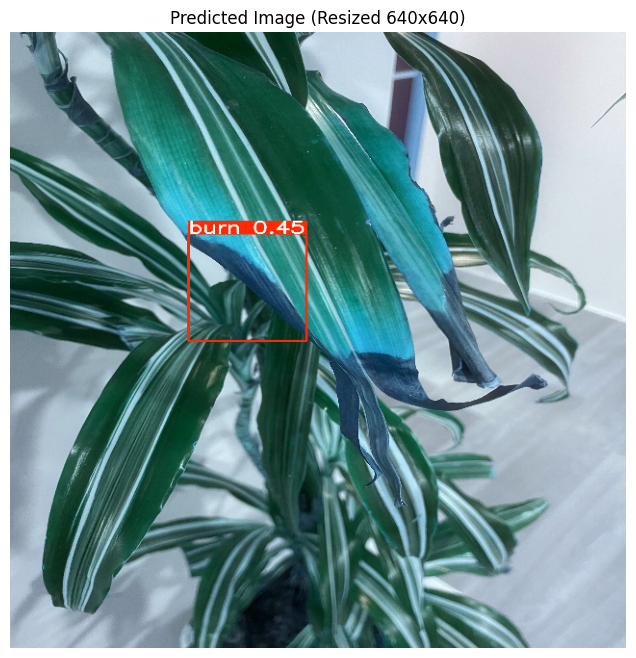

In [21]:
# Get prediction
results = model("/content/rahaf image3.jpg", save=True)

# Convert prediction to an image (NumPy array)
predicted_image = results[0].plot()

# Resize the image to 640x640
resized_image = cv2.resize(predicted_image, (640, 640))

# Display the resized image
plt.figure(figsize=(8, 8))
plt.imshow(resized_image)
plt.axis("off")
plt.title("Predicted Image (Resized 640x640)")
plt.show()


image 1/1 /content/test.jpg: 640x480 (no detections), 13.3ms
Speed: 3.5ms preprocess, 13.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


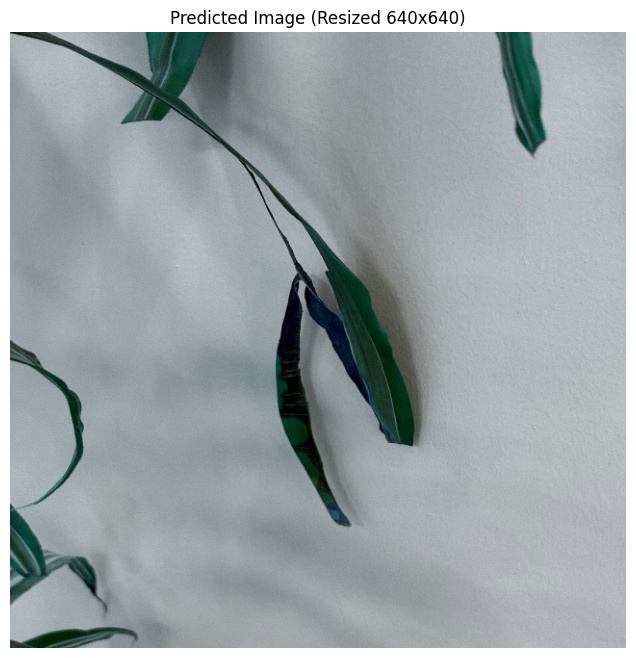

In [23]:
# Get prediction
results = model("/content/test.jpg", save=True)

# Convert prediction to an image (NumPy array)
predicted_image = results[0].plot()

# Resize the image to 640x640
resized_image = cv2.resize(predicted_image, (640, 640))

# Display the resized image
plt.figure(figsize=(8, 8))
plt.imshow(resized_image)
plt.axis("off")
plt.title("Predicted Image (Resized 640x640)")
plt.show()


image 1/1 /content/abdullah.jpg: 640x480 2 burns, 12.3ms
Speed: 3.5ms preprocess, 12.3ms inference, 1.9ms postprocess per image at shape (1, 3, 640, 480)
Results saved to runs/detect/predict


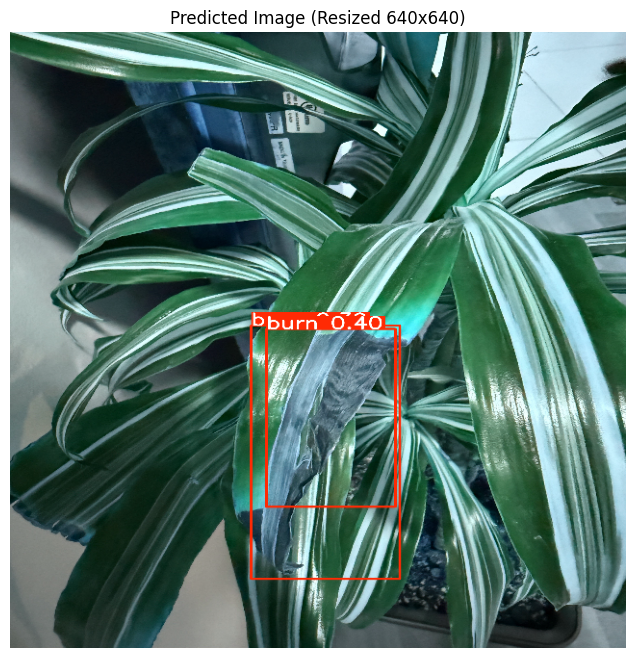

In [25]:
# Get prediction
results = model("/content/abdullah.jpg", save=True)

# Convert prediction to an image (NumPy array)
predicted_image = results[0].plot()

# Resize the image to 640x640
resized_image = cv2.resize(predicted_image, (640, 640))

# Display the resized image
plt.figure(figsize=(8, 8))
plt.imshow(resized_image)
plt.axis("off")
plt.title("Predicted Image (Resized 640x640)")
plt.show()